In [ ]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from dateutil import parser

In [82]:
# Data Loading

users = pd.read_csv('takehome_users.csv', encoding="ISO-8859-1")

user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [83]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [60]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [80]:
user_id_counts = user_engagement.user_id.value_counts() >= 3
potential_adopted_users = [user_id for user_id in user_id_counts.index if user_id_counts[user_id] == True]

In [81]:
adopted_users = []
for user in potential_adopted_users:
    user_dates = user_engagement[user_engagement.user_id == user].time_stamp.tolist()
    user_dates = [parser.parse(date) for date in user_dates]

    queue = user_dates[0:3]
    adopted = False
    cur_index = 2

    while adopted == False:
        if ((queue[-1] - queue[0]).days <= 7):
            adopted = True
        else:
            try:
                cur_index += 1
                queue.pop(0)
                queue.append(user_dates[cur_index])
            except:
                break

    if adopted == True:
        adopted_users.append(user)

In [84]:
print(len(adopted_users))

1656


In [85]:
def adopted_function(x, adopted_users_list):
    if x in adopted_users_list:
        return True
    else:
        return False

users['adopted'] = users['object_id'].apply(lambda x: adopted_function(x, adopted_users))

In [86]:
users.adopted.value_counts()

False    10344
True      1656
Name: adopted, dtype: int64

In [87]:
sns.set_style('darkgrid')

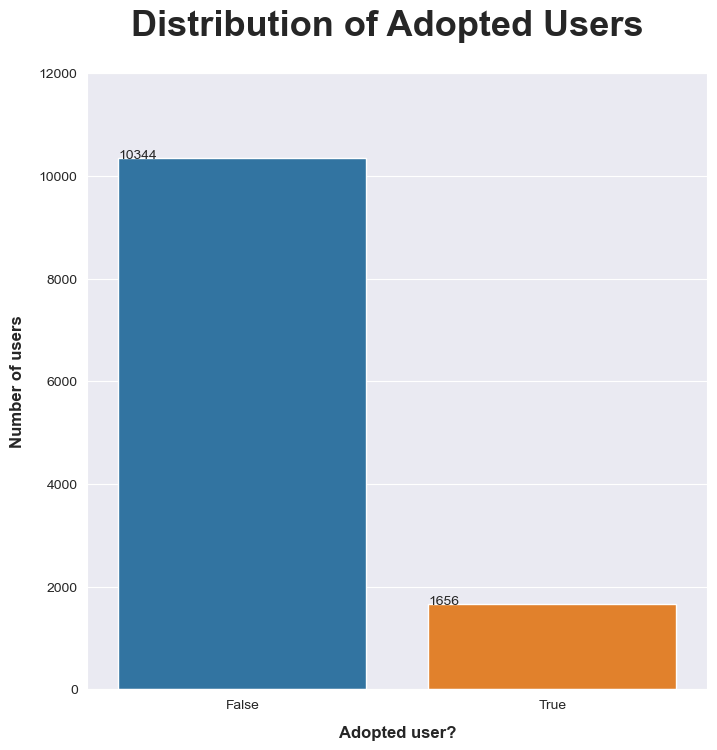

In [88]:
fig,ax1 = plt.subplots(figsize=(8, 8))

sns.countplot(x=users.adopted, ax=ax1)

# set titles
plt.suptitle('Distribution of Adopted Users', fontsize=26, y=0.96, fontweight='bold')
ax1.set_ylabel('Number of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

ax1.set_ylim(0,12000) # set ylim

for p in ax1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

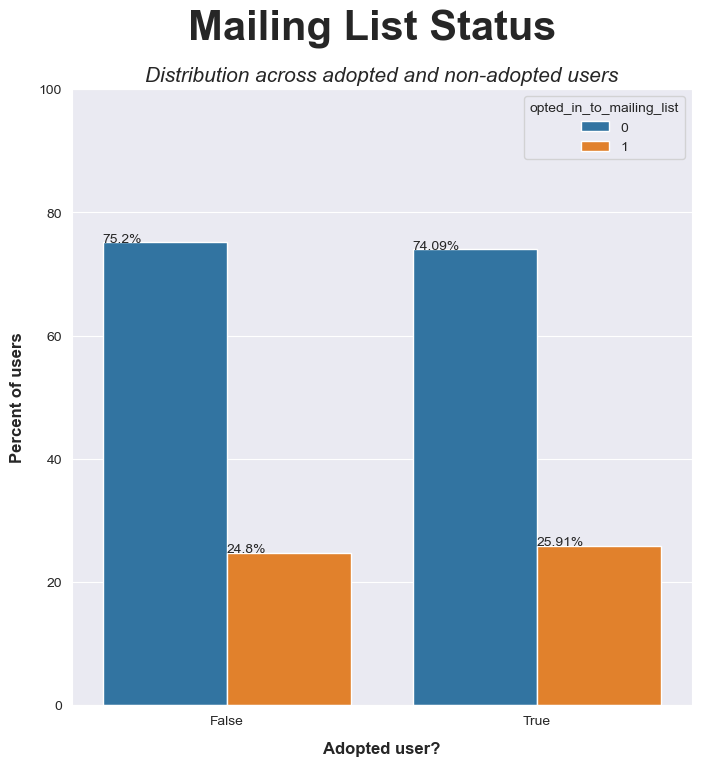

In [89]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'opted_in_to_mailing_list'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Mailing List Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)


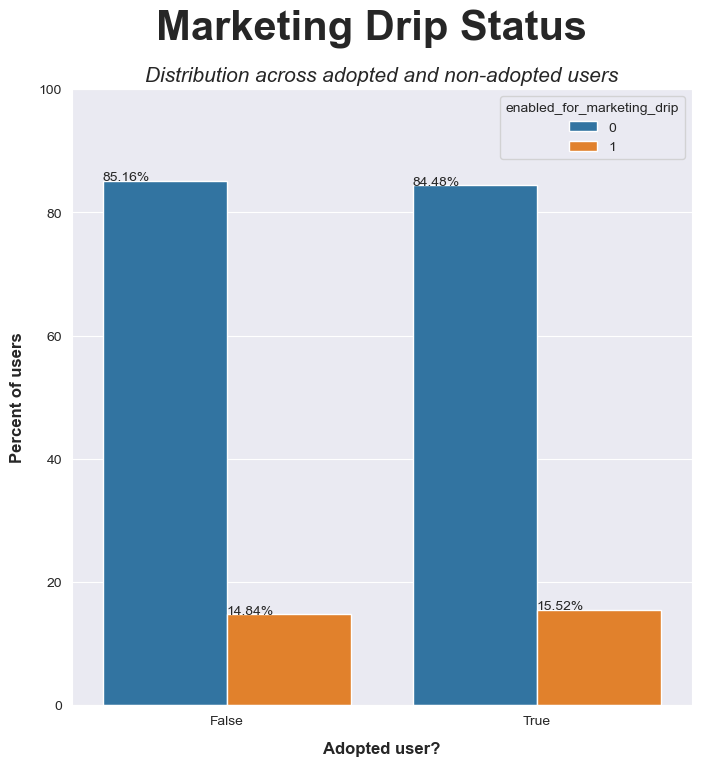

In [90]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'enabled_for_marketing_drip'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Marketing Drip Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)